In [1]:
import sys

sys.path.insert(0, '..')

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from rouge import Rouge

from main.common.common import *
from main.common.vocab import *
from main.common.simple_vocab import SimpleVocab
from main.common.util.file_util import FileUtil
from main.data.giga_world import *
from main.seq2seq import Seq2Seq

In [3]:
def show_attention_graph(article, summary, attention):
    article = article.split()
    summary = summary.split()
  
    attention = (attention[:, :-1])
    
    # figure
    figure = plt.figure(figsize=(20, 5))
    ax = figure.add_subplot(111)
    
    cax = ax.matshow(attention.numpy(), cmap='bone')
    figure.colorbar(cax)
    
    # set up axes
    ax.set_xticklabels([''] + article + ['[STOP]'], rotation=90)
    ax.set_yticklabels([''] + summary)

    # show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    plt.show()
    plt.close()
    
def get_score(summary, reference):
    summary = summary.split()
    summary = [w for w in summary if w != TK_STOP['word']]
    
    score = rouge.get_scores(' '.join(summary), reference)[0]["rouge-l"]["f"]
    
    return score

In [4]:
AppContext()

vocab = SimpleVocab(FileUtil.get_file_path(conf('vocab-file')), conf('vocab-size'))

seq2seq = cuda(Seq2Seq(vocab))

checkpoint = t.load(FileUtil.get_file_path(conf('model-file')))

seq2seq.load_state_dict(checkpoint['model_state_dict'])

seq2seq.eval()

data_loader = GigaWorldDataLoader(FileUtil.get_file_path(conf('train:article-file')), FileUtil.get_file_path(conf('train:summary-file')), 10)

2019-05-13 09:29:41 MainThread   DEBUG SimpleVocab:22 - initialize vocabulary from: /home/vivien/PycharmProjects/txt-summarization-master/data/train/giga-vocab.txt


>>> article:  south korea on monday announced sweeping tax reforms , including income and corporate tax cuts to boost growth by stimulating sluggish private consumption and business investment .
>>> reference:  skorea announces tax cuts to stimulate economy
>>> prediction:  delusions villegas assassination warn warn warn warn warn warn warn warn warn warn warn warn warn warn warn grove grove grove grove grove grove grove grove grove grove grove grove warn warn warn warn warn warn warn warn warn warn grove grove grove grove grove grove grove grove grove grove grove grove warn warn warn warn warn warn warn warn warn warn grove grove grove grove grove grove grove grove grove grove grove grove warn warn warn warn warn warn warn warn warn warn grove grove grove grove grove grove grove grove grove grove grove grove warn warn warn warn
>>> score:  0.0


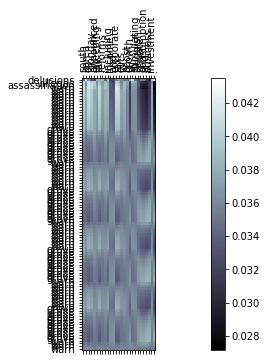

In [5]:
rouge = Rouge()

samples = data_loader.read_all()

article, reference = samples[3]

summary, attention = seq2seq.evaluate(article)

score = get_score(summary, reference)

print('>>> article: ', article)
print('>>> reference: ', reference)
print('>>> prediction: ', summary)
print('>>> score: ', score)

show_attention_graph(article, summary, attention)